In [53]:
# Step 1: Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import load
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from joblib import load
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [54]:
# Load the dataset
df = pd.read_excel('Billets.xlsx') 
print(df.head())

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54  


In [55]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)
# print rows with missing values
print("Rows with Missing Values:\n", df[df.isnull().any(axis=1)])

Missing Values:
 is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64
Rows with Missing Values:
       is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
72          True    171.94       103.89        103.45         NaN       3.25   
99          True    171.93       104.07        104.18         NaN       3.14   
151         True    172.07       103.80        104.38         NaN       3.02   
197         True    171.45       103.66        103.80         NaN       3.62   
241         True    171.83       104.14        104.06         NaN       3.02   
251         True    171.80       103.26        102.82         NaN       2.95   
284         True    171.92       103.83        103.76         NaN       3.23   
334         True    171.85       103.70        103.96         NaN       3.00   
410         True    172.56       103.72        103.51         NaN       3.12   
413       

In [56]:
# Selecting a feature with missing values (Example: "margin_low")
target_feature = "margin_low"

In [57]:
#  Define independent variables (All other features)
X = df.drop(columns=[target_feature, "is_genuine"])  
y = df[target_feature]  


In [58]:
# Split into known and unknown values
df_known = df.dropna(subset=[target_feature])  
df_missing = df[df[target_feature].isnull()]  

In [59]:
# Train Linear Regression Model (Multiple Regression)
X_train = df_known.drop(columns=[target_feature, "is_genuine"])  
y_train = df_known[target_feature]  
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [60]:
# Predict missing values
X_missing = df_missing.drop(columns=[target_feature, "is_genuine"])
predicted_values = model.predict(X_missing)


In [61]:
# Fill missing values with predictions
df.loc[df[target_feature].isnull(), target_feature] = predicted_values

print("Missing values filled using Linear Regression!")


Missing values filled using Linear Regression!


In [62]:
# Define features and target variable
X = df.drop(columns=["is_genuine"])
y = df["is_genuine"]

In [63]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [64]:
# Load the saved best model and voting classifier
best_model = load("best_model.pkl")

In [65]:
# Apply the model to the full dataset
y_pred = best_model.predict(X_scaled)

In [66]:
# Evaluate model performance
print("Final Model Evaluation")

print(classification_report(y, y_pred))

Final Model Evaluation
              precision    recall  f1-score   support

       False       1.00      0.98      0.99       500
        True       0.99      1.00      1.00      1000

    accuracy                           0.99      1500
   macro avg       0.99      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500



In [67]:
# Visualizing Predictions vs. Actual Values
df["Predicted"] = y_pred

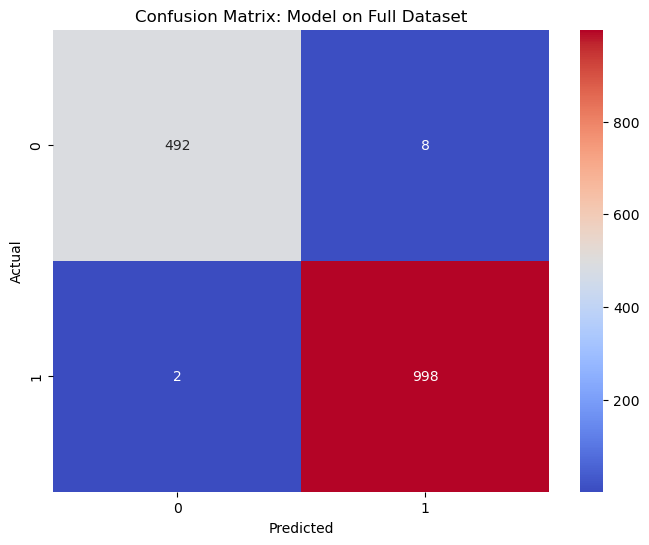

In [68]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="coolwarm")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix: Model on Full Dataset")
plt.show()

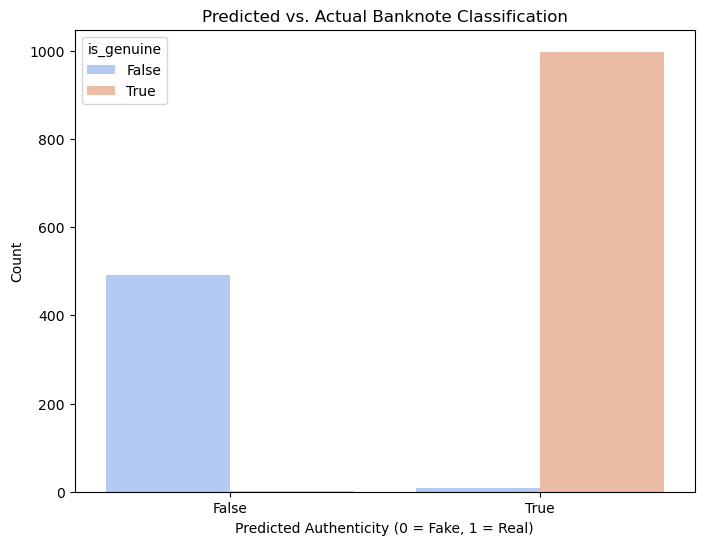

In [69]:
# Countplot: Comparing True vs. False Predictions
plt.figure(figsize=(8, 6))
sns.countplot(x=df["Predicted"], hue=df["is_genuine"], palette="coolwarm")
plt.xlabel("Predicted Authenticity (0 = Fake, 1 = Real)")
plt.ylabel("Count")
plt.title("Predicted vs. Actual Banknote Classification")
plt.show()

In [70]:
# print column with false predictions
false_predictions = df[df["Predicted"] != df["is_genuine"]]
print("False Predictions:")
print(false_predictions[["Predicted", "is_genuine"]])


False Predictions:
      Predicted  is_genuine
591       False        True
728       False        True
1025       True       False
1073       True       False
1083       True       False
1103       True       False
1122       True       False
1160       True       False
1407       True       False
1412       True       False
